In [2]:
import catboost
import xgboost
import lightgbm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier     
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

from asid.automl_imbalanced.abb import AutoBalanceBoost

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from hyperopt import hp, fmin, tpe

from model.reduce_model import ReduceModel, AE, VAE

In [3]:
dataset = pd.read_csv("main_datasets/dataset.csv", index_col=0)
target = pd.read_csv("main_datasets/target.csv", index_col=0)

In [7]:
reduce_model = ReduceModel(AE((1145, 286, 72, 18, 5)))

In [8]:
reduce_model.train(100)

100%|██████████| 100/100 [00:34<00:00,  2.88it/s]

Epoch 100, Train Loss: 1.0461395546837255e-05
Epoch 100, Validation Loss: 1.0623889052526051e-05


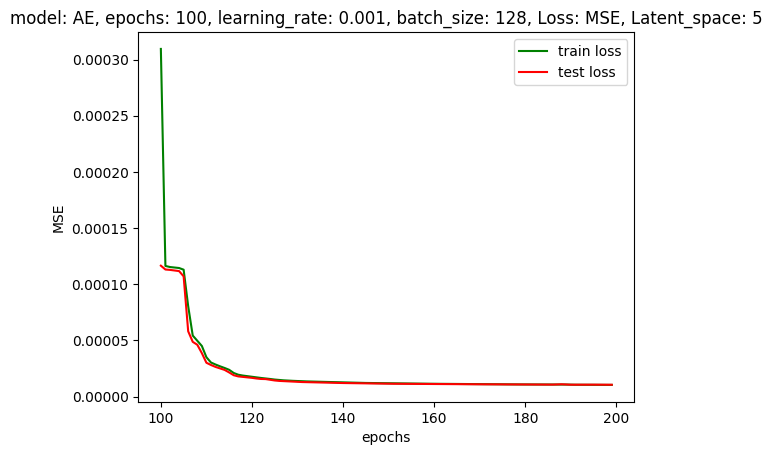

In [9]:
reduce_model.plot_loss()

In [10]:
main_reduced = reduce_model.transform(dataset)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

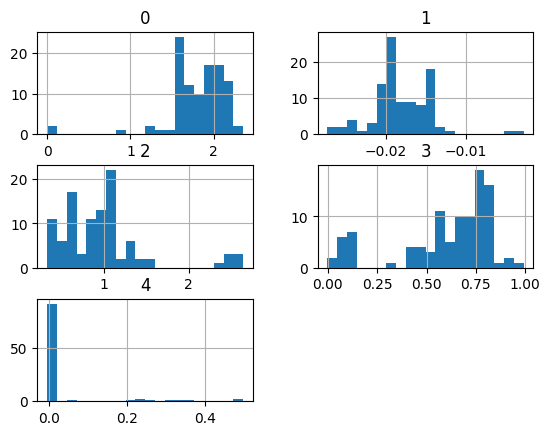

In [11]:
pd.DataFrame(main_reduced).hist(bins=20)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    main_reduced, target.values.ravel(), test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

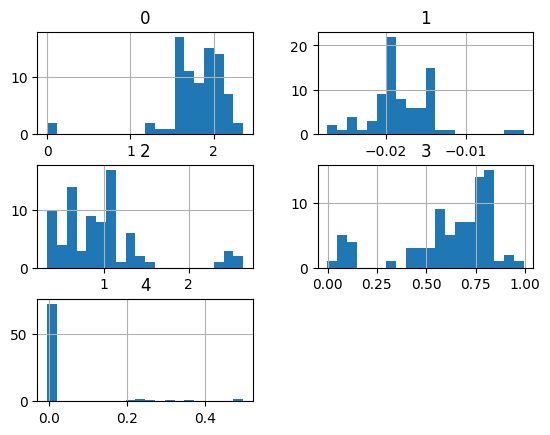

In [13]:
pd.DataFrame(X_train).hist(bins=20)

In [52]:
clf = catboost.CatBoostClassifier(iterations=80, depth=4, l2_leaf_reg=10, learning_rate=1e-2)
clf.fit(X_train, y_train)

0:	learn: 0.6923906	total: 765us	remaining: 60.4ms
1:	learn: 0.6920979	total: 1.65ms	remaining: 64.4ms
2:	learn: 0.6918703	total: 2.46ms	remaining: 63.3ms
3:	learn: 0.6911271	total: 3.27ms	remaining: 62.2ms
4:	learn: 0.6906777	total: 3.97ms	remaining: 59.6ms
5:	learn: 0.6903853	total: 4.61ms	remaining: 56.9ms
6:	learn: 0.6899433	total: 5.23ms	remaining: 54.5ms
7:	learn: 0.6894631	total: 5.88ms	remaining: 52.9ms
8:	learn: 0.6889635	total: 6.56ms	remaining: 51.8ms
9:	learn: 0.6886052	total: 7.22ms	remaining: 50.6ms
10:	learn: 0.6882385	total: 7.92ms	remaining: 49.7ms
11:	learn: 0.6875697	total: 8.6ms	remaining: 48.8ms
12:	learn: 0.6872086	total: 12ms	remaining: 62.1ms
13:	learn: 0.6868780	total: 12.7ms	remaining: 60.1ms
14:	learn: 0.6865385	total: 13.6ms	remaining: 58.9ms
15:	learn: 0.6858549	total: 14.4ms	remaining: 57.5ms
16:	learn: 0.6853967	total: 15.1ms	remaining: 56.1ms
17:	learn: 0.6851582	total: 15.9ms	remaining: 54.7ms
18:	learn: 0.6849850	total: 16.6ms	remaining: 53.4ms
19:	lea

In [53]:
print(metrics.classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        17
         1.0       1.00      0.75      0.86         4

    accuracy                           0.95        21
   macro avg       0.97      0.88      0.91        21
weighted avg       0.96      0.95      0.95        21

